# Regression
CMP5101 notes (Tevfik Aytekin)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

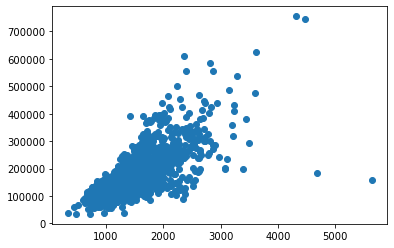

In [4]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

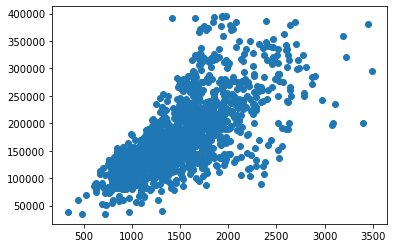

In [5]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


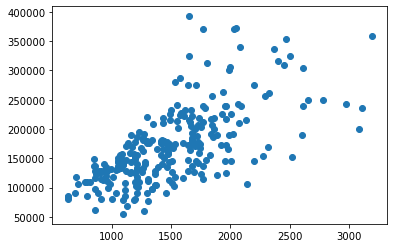

In [6]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [7]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

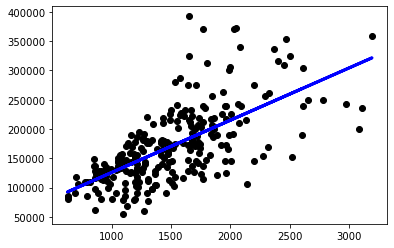

In [8]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [9]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

36488.12546135817
[89.23721665]


#### Can we interpret the above coefficient as increase in price per square feet?

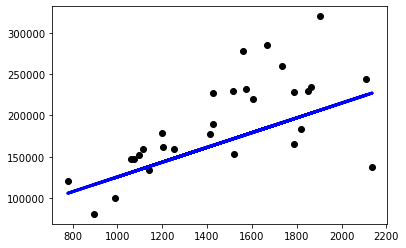

In [10]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [11]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 35682.94309894733
35682.94309894734
Test MAE: 38844.845985998705


In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 19.76983268900069


In [13]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.25752747220775873


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [14]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 47933.233731383334
Baseline (mean) MAPE: 25.67531090262692


In [15]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.24336446367799128
Baseline (mean) Kaggle-score: 0.32087997618279457


In [16]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [17]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 36171.38532901869
Test Kaggle-Score: 0.265562703585415
Test MAPE: 22.0494849324664
Intercept: 62201.84640321968
[['GrLivArea' '129.71126806293574']
 ['Bedroom' '-26991.986402074454']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

In [18]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 56593.798840767966
Test Kaggle-Score: 0.3994661228735732
Test MAPE: 35.95980982724175
Intercept: 129964.70789585807
[['Bedroom' '17963.53585767087']]


In [19]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 24084.5917047295
Test Kaggle-Score: 0.195395971389874
Test MAPE: 14.525266456168785
Intercept: -1133733.2891739602
[['OverallQual' '20469.239693544205']
 ['GrLivArea' '50.8110105937795']
 ['GarageCars' '11446.58981208722']
 ['GarageArea' '11.336537653463088']
 ['TotalBsmtSF' '19.39273967333338']
 ['1stFlrSF' '15.010441623950042']
 ['FullBath' '-5816.366095500295']
 ['TotRmsAbvGrd' '-436.32098755921277']
 ['YearBuilt' '232.13275116058853']
 ['YearRemodAdd' '304.11496793437306']]


In [20]:
X.shape

(1460, 10)

In [21]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 19547.631391761704
Test Kaggle-Score: 0.20300643630453646
Test MAPE: 11.883973800302408
Intercept: 276696.44842900446
[['MSSubClass' -42.48875018113331]
 ['LotFrontage' 18.97902327872572]
 ['LotArea' 0.7350959484069914]
 ['OverallQual' 7129.239995424882]
 ['OverallCond' 5571.665434199265]
 ['YearBuilt' 270.25256351896223]
 ['YearRemodAdd' 78.39923450218859]
 ['MasVnrArea' 17.82617457749535]
 ['BsmtFinSF1' 16.146590088254854]
 ['BsmtFinSF2' 7.172883313652278]
 ['BsmtUnfSF' 0.2917957906352058]
 ['TotalBsmtSF' 23.61128830079224]
 ['1stFlrSF' 18.80990974749602]
 ['2ndFlrSF' 36.08040249629812]
 ['LowQualFinSF' -36.27895805358611]
 ['GrLivArea' 18.611467381017974]
 ['BsmtFullBath' 2441.9441754339773]
 ['BsmtHalfBath' -2451.6972287086287]
 ['FullBath' 4132.70748295506]
 ['HalfBath' 3024.5633370327364]
 ['BedroomAbvGr' -3300.8747589538875]
 ['KitchenAbvGr' -13267.98008938907]
 ['TotRmsAbvGrd' 2602.50227110909]
 ['Fireplaces' 5867.768669135731]
 ['GarageYrBlt' -19.982895757794893]
 ['

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [22]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19046.63011546 -18850.54099706 -19965.80441316 -15996.68770613
 -20272.26396749]


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [23]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[1.200e+02 2.012e+03 1.500e+05]
[9.00e+01 1.99e+03 1.00e+05]


In [25]:
print(scaler.transform(df))

[[0.33333333 0.         0.        ]
 [1.         0.54545455 1.        ]
 [0.         1.         0.4       ]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.26726124 -1.26012384 -1.13554995]
 [ 1.33630621  0.07412493  1.29777137]
 [-1.06904497  1.18599891 -0.16222142]]


### Example

In [27]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 29807.27645178676
Test Kaggle-score: 0.23536430866713887
Test MAPE: 17.83631087746727
[[0.0509617  0.77777778]
 [0.04732525 0.44444444]
 [0.05502349 0.55555556]
 ...
 [0.02664236 0.55555556]
 [0.00297273 0.33333333]
 [0.04733927 0.77777778]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


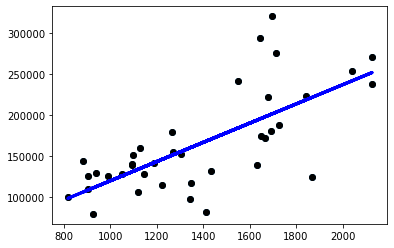

In [28]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

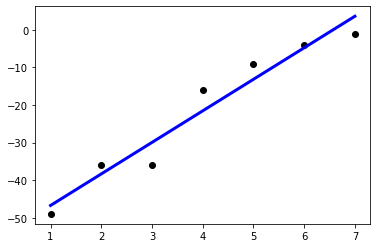

In [29]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25       -0.60714286]
-62.4285714285714


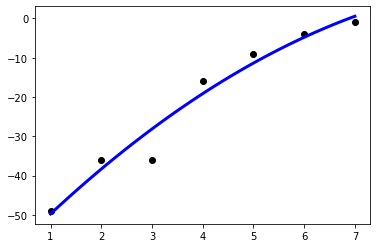

In [30]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[ 3.92548440e+00  7.13912845e+00  6.47138798e+00 -4.98518482e-01
 -6.85905697e+00  4.26587424e+00 -1.05595717e+00  1.19355760e-01
 -5.11404786e-03]
-62.50258416955434


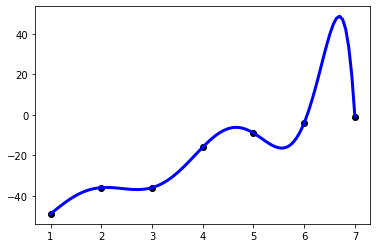

In [31]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[ 3.07391854e-01  5.77397076e-01  5.77329049e-01  1.04592385e-01
 -4.04882677e-01  2.54198846e-01 -6.78184427e-02  8.18085019e-03
 -3.67852344e-04]
-47.31663662400673


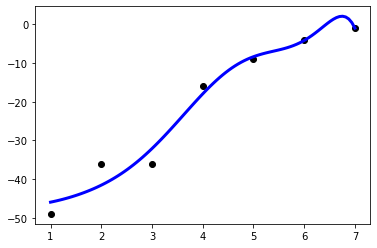

In [32]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [33]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 36666.77483302439
Test Kaggle-Score: 0.27392453158491503
Test MAPE: 22.68733389941747
Intercept: -3859.8143132045225
[[1.710000e+03 3.000000e+00 2.924100e+06 5.130000e+03 9.000000e+00]
 [1.262000e+03 3.000000e+00 1.592644e+06 3.786000e+03 9.000000e+00]
 [1.786000e+03 3.000000e+00 3.189796e+06 5.358000e+03 9.000000e+00]
 ...
 [2.340000e+03 4.000000e+00 5.475600e+06 9.360000e+03 1.600000e+01]
 [1.078000e+03 2.000000e+00 1.162084e+06 2.156000e+03 4.000000e+00]
 [1.256000e+03 3.000000e+00 1.577536e+06 3.768000e+03 9.000000e+00]]


### Batch Gradient Descent Implementation

In [34]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [35]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [38]:
import copy

n_features = 2
learning_rate = 0.3
n_iter=200
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

180920.7714595259
116682.00535713557
78141.30384652459
60034.49345528088
54247.745874062384
52869.736867978274
52914.4107471986
53201.430043183595
53526.521488306214
53782.75213046289
53953.18146314371
54053.98449444362
54099.36551907094
54105.4579043765
54084.988927392726
54046.84799047009
53997.366664489746
53940.72141524736
53879.49329621368
53815.73362475368
53750.16003271778
53683.57509659512
53616.3901315959
53549.109806112334
53481.76590857769
53414.47061420081
53347.25935164818
53280.39714170832
53213.93423947679
53147.62412132086
53081.47780034244
53015.504056328355
52949.799970514025
52884.280340433914
52818.94345257111
52753.790303270674
52688.82131332331
52624.079924518686
52559.72719443037
52495.57376506459
52431.66494350999
52367.95131872785
52304.514156037025
52241.25750580713
52178.18078816074
52115.33349234659
52052.73932702175
51990.32295528294
51928.08378142466
51866.02121000691
51804.148122447106
51742.70312531774
51681.472906143936
51620.41559730769
51559.530616569

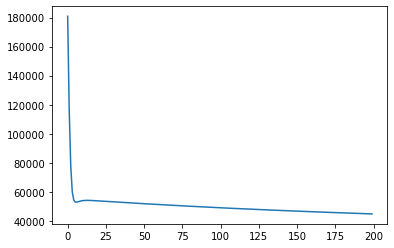

In [39]:
plt.plot(cost_array)

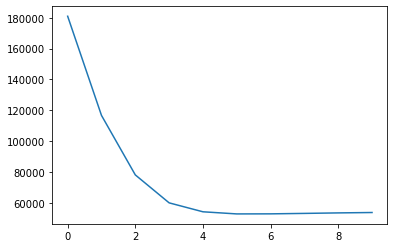

In [40]:
plt.plot(cost_array[:10])